In [162]:
import math

In [163]:
# Item Response Theory
import math             
ability_of_student=0.4
difficulty_of_question=0.5

In [164]:
def logit(p):
    try:
        return math.log(p/(1-p))
    except:
        return p

def logit_inverse(x):
    return 1/(1+math.exp(-x))

In [165]:
# 1PL IRT Model
def IRT_1PL_Probab(ability_of_student,difficulty_of_question):
    return 1/(1+math.exp(-1*(ability_of_student-difficulty_of_question)))

def next_ability_onIRT_1PL(ability_of_student,difficulty_of_question):
    probability=IRT_1PL_Probab(ability_of_student,difficulty_of_question)
    temp=logit(probability) #logit
    return logit_inverse(temp+difficulty_of_question)

def next_difficulty_onIRT_1PL(ability_of_student,difficulty_of_question):
    probability=IRT_1PL_Probab(ability_of_student,difficulty_of_question)
    temp=logit(probability) #logit
    return logit_inverse(ability_of_student-temp)


In [166]:
def calculate_discrimination_param(ability_of_student,difficulty_of_question):
    return logit(IRT_1PL_Probab(ability_of_student,difficulty_of_question))-logit(IRT_1PL_Probab(ability_of_student,difficulty_of_question))

In [167]:
# 2PL IRT Model
def IRT_2PL_Probab(ability_of_student,difficulty_of_question):
    # discrimination_param= shows how well a test question can tell the difference between people who know a subject well and those who don't.
    discrimination_param=calculate_discrimination_param(ability_of_student,difficulty_of_question)
    return logit_inverse(discrimination_param*(ability_of_student-difficulty_of_question))

def next_ability_onIRT_2PL(ability_of_student,difficulty_of_question):
    probability=IRT_2PL_Probab(ability_of_student,difficulty_of_question)
    temp=logit(probability) #logit
    return logit_inverse(temp+difficulty_of_question)

def next_difficulty_onIRT_2PL(ability_of_student,difficulty_of_question):
    probability=IRT_2PL_Probab(ability_of_student,difficulty_of_question)
    temp=logit(probability) #logit
    return logit_inverse(ability_of_student-temp)

In [168]:
# # 3PL_IRT Model 
def IRT_3PL_Probab(ability_of_student,difficulty_of_question,chance_of_guessing=0.25):
    discrimination_param=calculate_discrimination_param(ability_of_student,difficulty_of_question)
    return chance_of_guessing+(1-chance_of_guessing)*logit(discrimination_param*(ability_of_student-difficulty_of_question))

def next_ability_onIRT_3PL(ability_of_student,difficulty_of_question,chance_of_guessing=0.25):
    probability=IRT_3PL_Probab(ability_of_student,difficulty_of_question,chance_of_guessing)
    temp=logit(probability) #logit
    return logit_inverse(difficulty_of_question+temp)

def next_difficulty_onIRT_3PL(ability_of_student,difficulty_of_question):
    probability=IRT_3PL_Probab(ability_of_student,difficulty_of_question)
    temp=logit(probability) #logit
    return logit_inverse(ability_of_student-temp)



In [169]:
# 4PL_IRT Model
def IRT_4PL_Probab(ability_of_student,difficulty_of_question,chance_of_guessing=0.25,asymtotic_notation=0.1):
    # here, asymtotic notation is the upper asymptote, representing the upper limit on the chance of getting the answer correct whereas chance of guessing is the lower asymptote, representing the lower limit on the chance of getting the answer correct.
    return chance_of_guessing+(asymtotic_notation-chance_of_guessing)*logit(IRT_2PL_Probab(ability_of_student,difficulty_of_question))-asymtotic_notation*difficulty_of_question

def next_ability_onIRT_4PL(ability_of_student,difficulty_of_question,chance_of_guessing=0.25,asymtotic_notation=0.1):
    probability=IRT_4PL_Probab(ability_of_student,difficulty_of_question,chance_of_guessing,asymtotic_notation)
    temp=logit(probability) #logit
    return logit_inverse(difficulty_of_question+temp)

def next_difficulty_onIRT_4PL(ability_of_student,difficulty_of_question):
    probability=IRT_4PL_Probab(ability_of_student,difficulty_of_question)
    temp=logit(probability) #logit
    return logit_inverse(ability_of_student-temp)

In [170]:
print(next_ability_onIRT_1PL(0.4,0.5))
print(next_ability_onIRT_2PL(0.4,0.5))
print(next_ability_onIRT_3PL(0.4,0.5))
print(next_ability_onIRT_4PL(0.4,0.5))

0.598687660112452
0.6224593312018546
0.35466124439244334
0.2918751327405783


In [171]:
# Comparision Graph Plot
import numpy as np
import matplotlib.pyplot as plt

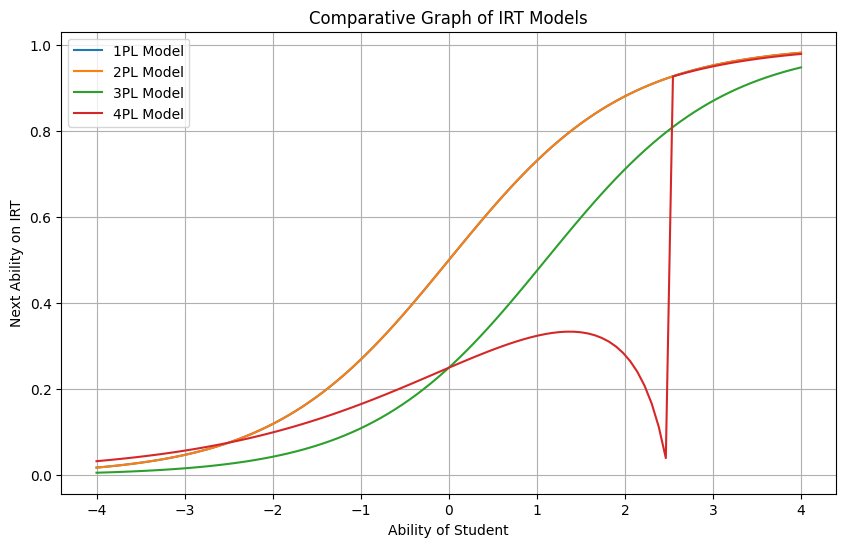

In [174]:
# Generate sample data
ability_values = np.linspace(-4,4,100)  
difficulty_value = np.linspace(-4,4,100)  


# Calculate next_ability_onIRT values for each IRT model
result_1PL = [next_ability_onIRT_1PL(ability, difficulty) for ability, difficulty in zip (ability_values,difficulty_value)]
result_2PL = [next_ability_onIRT_2PL(ability, difficulty) for ability, difficulty in zip (ability_values,difficulty_value)]
result_3PL = [next_ability_onIRT_3PL(ability, difficulty) for ability, difficulty in zip (ability_values,difficulty_value)]
result_4PL = [next_ability_onIRT_4PL(ability, difficulty) for ability, difficulty in zip (ability_values,difficulty_value)]

result_1PL=[]
ability=0.4
diff=0.3
for i in range(100):
    result_1PL.append(next_ability_onIRT_1PL(ability,diff))
    ability=next_ability_onIRT_1PL(ability,diff)
    diff=next_difficulty_onIRT_1PL(ability,diff)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ability_values, result_1PL, label='1PL Model')
plt.plot(ability_values, result_2PL, label='2PL Model')
plt.plot(ability_values, result_3PL, label='3PL Model')
plt.plot(ability_values, result_4PL, label='4PL Model')

plt.xlabel('Ability of Student')
plt.ylabel('Next Ability on IRT')
plt.title('Comparative Graph of IRT Models')
plt.legend()
plt.grid(True)
plt.show()

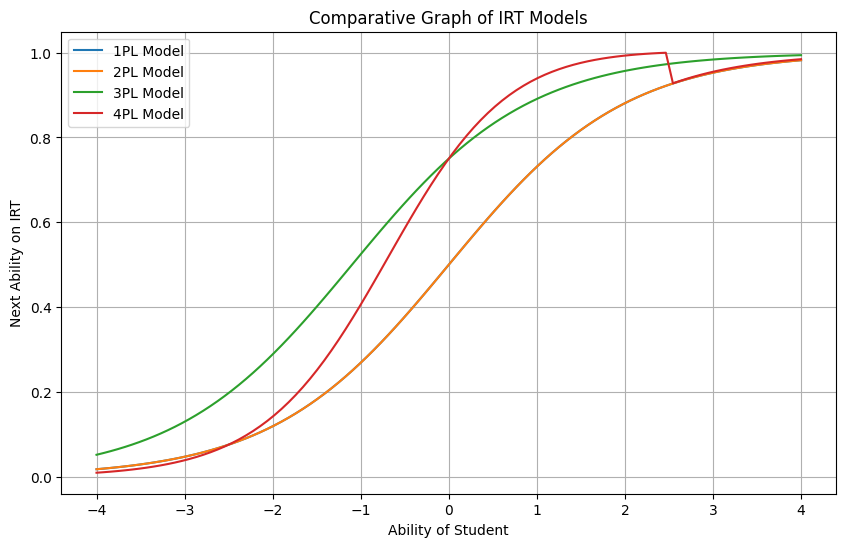

In [175]:
# Calculate next_ability_onIRT values for each IRT model
result_1PL = [next_difficulty_onIRT_1PL(ability, difficulty) for ability, difficulty in zip (ability_values,difficulty_value)]
result_2PL = [next_difficulty_onIRT_2PL(ability, difficulty) for ability, difficulty in zip (ability_values,difficulty_value)]
result_3PL = [next_difficulty_onIRT_3PL(ability, difficulty) for ability, difficulty in zip (ability_values,difficulty_value)]
result_4PL = [next_difficulty_onIRT_4PL(ability, difficulty) for ability, difficulty in zip (ability_values,difficulty_value)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ability_values, result_1PL, label='1PL Model')
plt.plot(ability_values, result_2PL, label='2PL Model')
plt.plot(ability_values, result_3PL, label='3PL Model')
plt.plot(ability_values, result_4PL, label='4PL Model')

plt.xlabel('Ability of Student')
plt.ylabel('Next Ability on IRT')
plt.title('Comparative Graph of IRT Models')
plt.legend()
plt.grid(True)
plt.show()